# Genesis Module 2: Strategy Comparison
## Part 4: Hawk vs. Dove vs. Balanced

**Objective:**
Compare the performance of three different Control Strategies under identical stress conditions.

**The Contenders:**
1.  **🕊️ The Dove:** Low $K_p$. Prioritizes low taxes, but risks runaway inflation.
2.  **🦅 The Hawk:** High $K_p$. Prioritizes stability, but risks crushing the economy (Deflation).
3.  **⚖️ Balanced:** Moderate $K_p$. The compromise candidate.

**Hypothesis:**
The "Hawk" will stabilize the fastest but cause the deepest recession.
The "Dove" will be the most "player friendly" (low tax) but might never return to the target.

🏎️ STARTING RACE...
   Running: 🦅 The Hawk (Aggressive)...
   Running: 🕊️ The Dove (Conservative)...
   Running: ⚖️ Balanced...


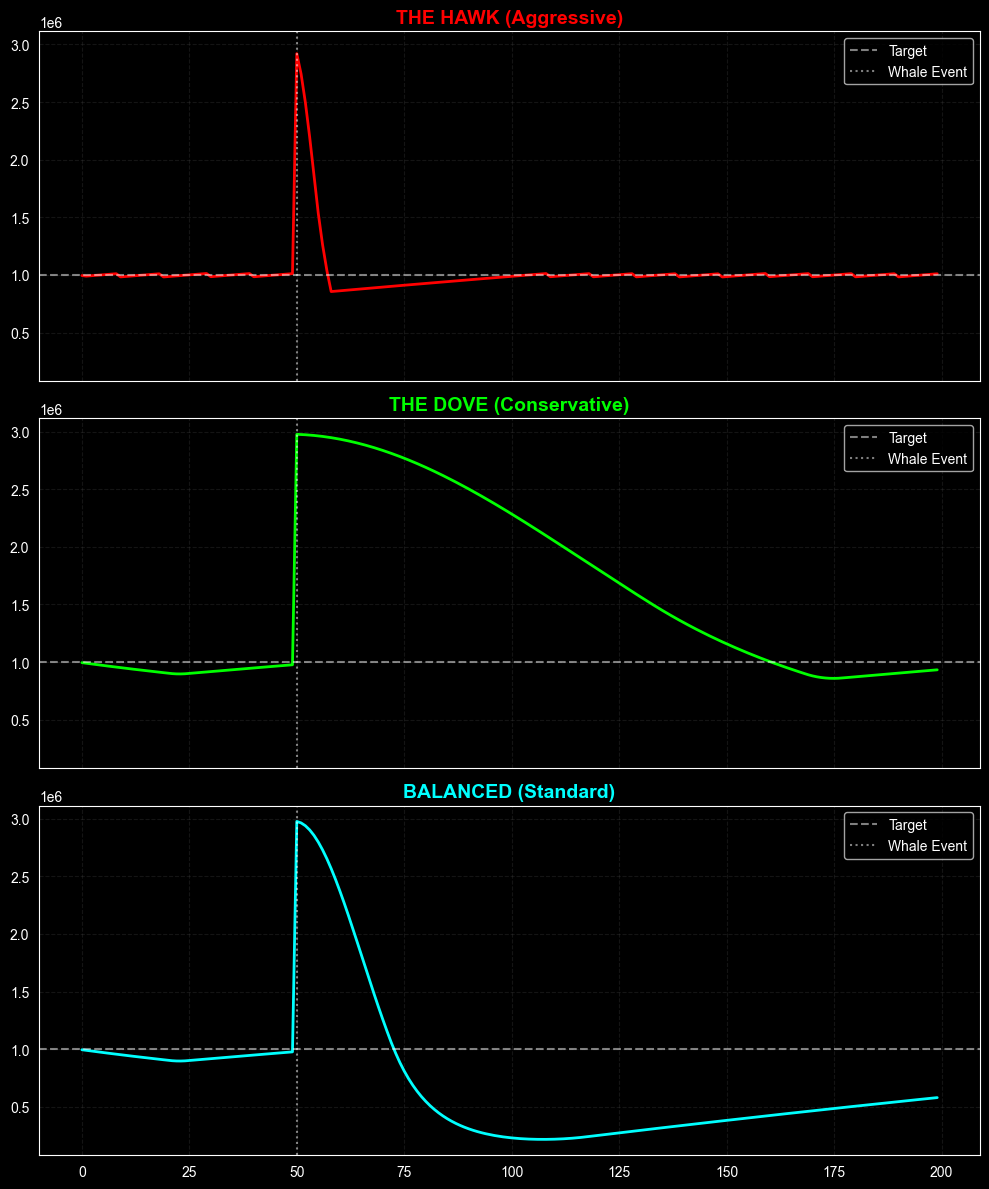

In [3]:
# Cell 1: Setup and Import
import sys
import os
import matplotlib.pyplot as plt

# Add project root to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# IMPORT the real class (make sure you saved the file above!)
from src.economy import Economy
from src.central_bank import CentralBankAI

# Cell 2: Run Simulation
DAYS = 200
WHALE_DAY = 50
WHALE_AMOUNT = 2_000_000
DAILY_INCOME = 5_000

def run_simulation(strategy_name):
    world = Economy(start_money=1_000_000)
    ai = CentralBankAI(strategy=strategy_name)
    data = []

    for day in range(DAYS):
        world.inject_money(DAILY_INCOME)
        if day == WHALE_DAY:
            world.inject_money(WHALE_AMOUNT)

        world.transaction(world.money_supply * 0.20)
        ai.decide_policy(world)
        data.append(world.money_supply)
    return data

# Run all 3
strategies = ["🦅 The Hawk (Aggressive)", "🕊️ The Dove (Conservative)", "⚖️ Balanced"]
results = {}

print("🏎️ STARTING RACE...")
for strat in strategies:
    print(f"   Running: {strat}...")
    results[strat] = run_simulation(strat)

# Cell 3: Plotting (Subplots)
plt.style.use('dark_background')
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True, sharey=True)

strategy_keys = ["🦅 The Hawk (Aggressive)", "🕊️ The Dove (Conservative)", "⚖️ Balanced"]
clean_names = ["THE HAWK (Aggressive)", "THE DOVE (Conservative)", "BALANCED (Standard)"]
colors = ["#FF0000", "#00FF00", "#00FFFF"]

for ax, key, name, color in zip(axes, strategy_keys, clean_names, colors):
    ax.plot(results[key], color=color, linewidth=2)
    ax.axhline(y=1_000_000, color='white', linestyle='--', alpha=0.5, label='Target')
    ax.axvline(x=WHALE_DAY, color='white', linestyle=':', alpha=0.5, label='Whale Event')
    ax.set_title(name, color=color, fontsize=14, fontweight='bold')
    ax.grid(True, color='#444444', linestyle='--', alpha=0.3)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()